<a href="https://colab.research.google.com/github/AnandSinhaProjects/Random_Test/blob/main/R_Projects/Handwriting_Recogniton/R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data <- read.csv("train.csv")

In [ ]:
dim(data)

[1] 42000   785

In [ ]:
head(data[1:6])

,label,pixel0,pixel1,pixel2,pixel3,pixel4
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,4,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0


In [ ]:
unique(unlist(data[1]))

[1] 1 0 4 7 3 5 8 9 2 6

In [ ]:
min(data[2:785])

[1] 0

In [ ]:
max(data[2:785])

[1] 255

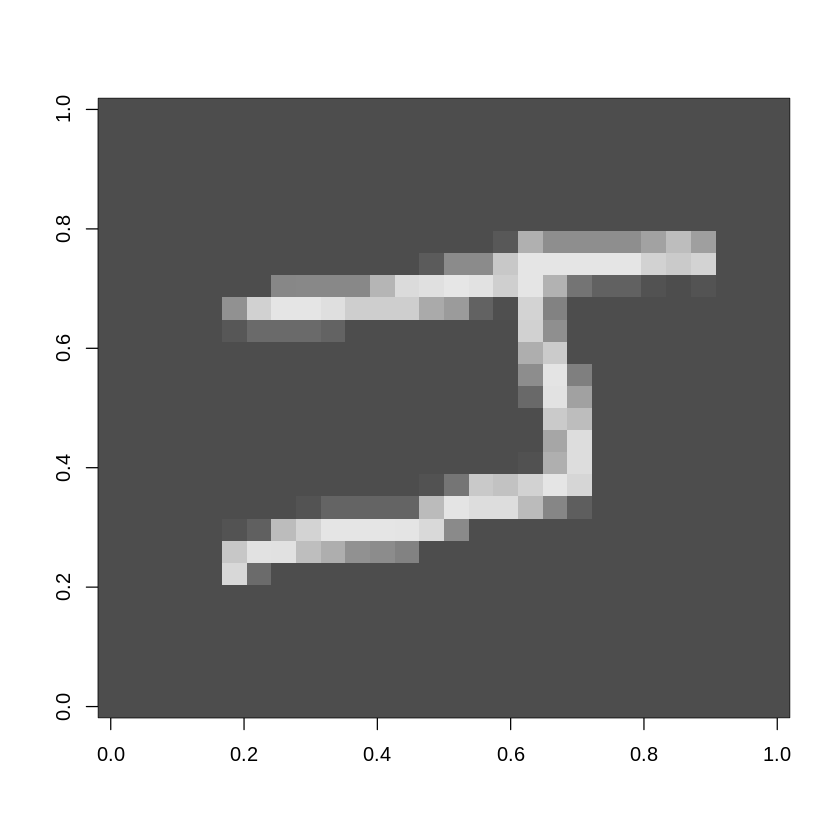

In [ ]:
sample_4 <- matrix(as.numeric(data[4, -1]),nrow = 28, byrow = TRUE)
image(sample_4, col=grey.colors(255)) 

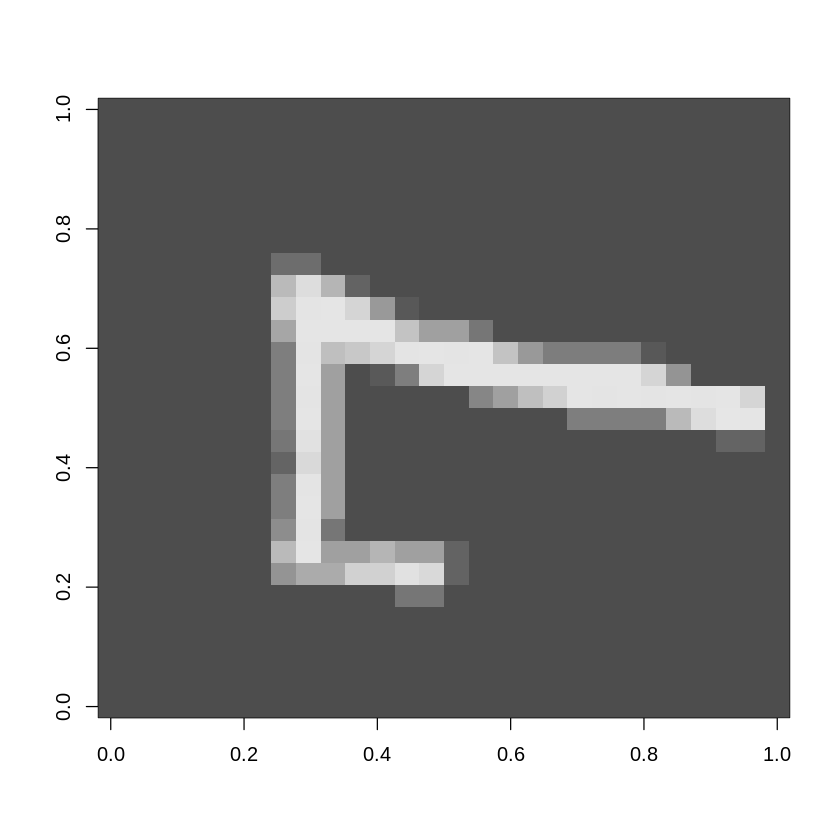

In [ ]:
sample_7<-matrix(as.numeric(data[7,-1]), nrow=28, byrow = TRUE)
image(sample_7, col = grey.colors(255))

In [ ]:
rotate <- function(x) t(apply(x, 2, rev))

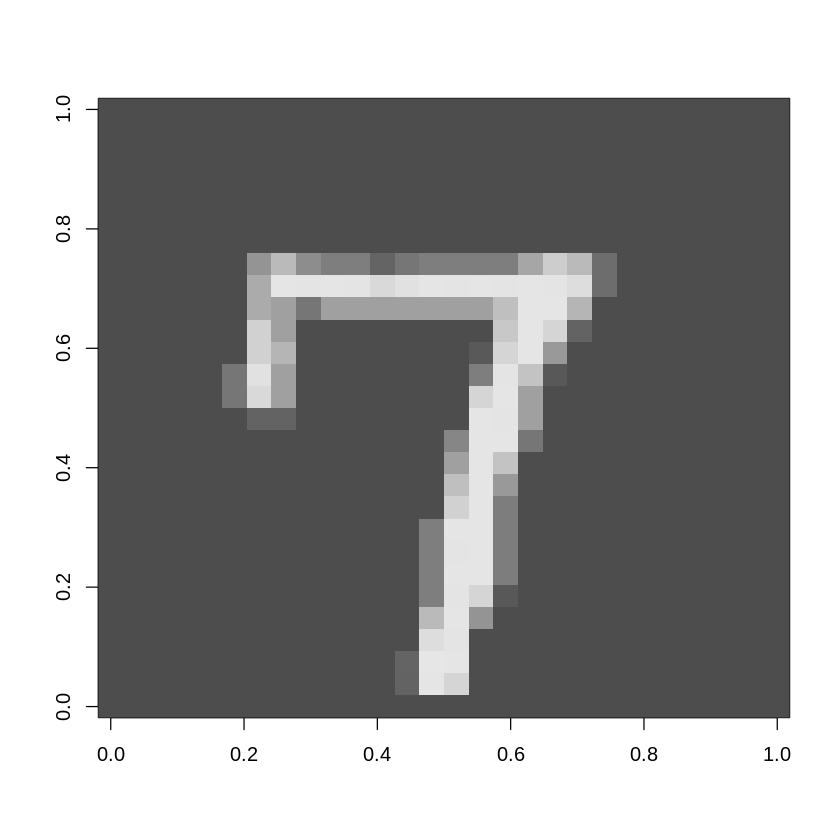

In [ ]:
image(rotate(sample_7),col = grey.colors(255))

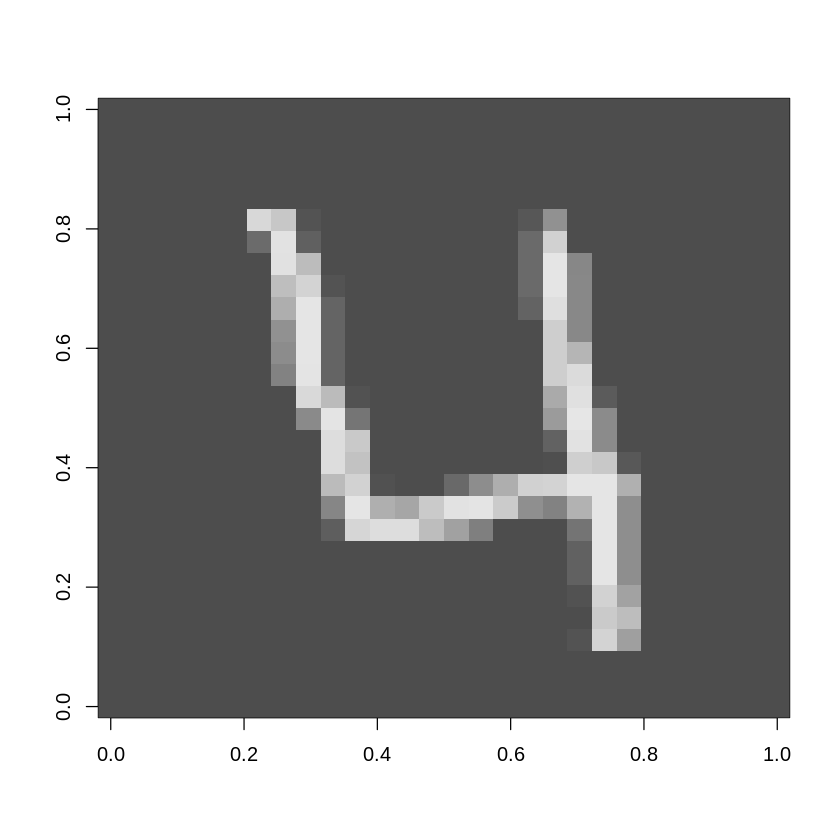

In [ ]:
image(rotate(sample_4), col = grey.colors(255))

In [ ]:
is.factor(data$label)

[1] FALSE

In [ ]:
data$label<-as.factor(data$label)

In [ ]:
is.factor(data$label)

[1] TRUE

In [ ]:
summary(data$label)

0    1    2    3    4    5    6    7    8    9 
4132 4684 4177 4351 4072 3795 4137 4401 4063 4188

In [ ]:
proportions <- prop.table(table(data$label))*100

In [ ]:
cbind(count=table(data$label), proportions=proportions)

,count,proportions
0,4132,9.838095
1,4684,11.152381
2,4177,9.945238
3,4351,10.359524
4,4072,9.695238
5,3795,9.035714
6,4137,9.850000
7,4401,10.478571
8,4063,9.673810
9,4188,9.971429


In [ ]:
central_block <- c("pixel1376","pixel377","pixel1404","pixel1405")

In [ ]:
par(mfrow=c(2,2))

In [ ]:
#for(i in 1:9){
 # hist(c(as.matrix(data[data$label==i, central_block])),
  #main=sprintf("Histogram for digit %d", i),
  #xlab="Pixel value")
#}

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('caret')

In [ ]:
set.seed(42)

In [ ]:
train_perc = 0.75

In [ ]:
train_index = createDataPartition(data$label, p=train_perc, list=FALSE)

In [ ]:
data_train <- data[train_index,]
data_test <- data[-train_index,]

In [ ]:
library(nnet)

### MULTINOMINAL LOGISTIC REGRESSION

In [ ]:
model_lr <- multinom(label ~.,data = data_train, MaxNWts=10000, decay=5e-3, maxit=100)

# weights:  7860 (7065 variable)
initial  value 72538.338185 
iter  10 value 17167.287206
iter  20 value 11143.319043
iter  30 value 9585.761246
iter  40 value 8886.505538
iter  50 value 8468.049869
iter  60 value 8197.268142
iter  70 value 8037.098299
iter  80 value 7920.335345
iter  90 value 7848.282919
iter 100 value 7781.881284
final  value 7781.881284 
stopped after 100 iterations


In [ ]:
prediction_lr <- predict(model_lr, data_test, type='class')

ERROR: ignored

In [ ]:
cm_lr= table(data_test$label, prediction_lr)
cm_lr

   prediction_lr
       0    1    2    3    4    5    6    7    8    9
  0  963    0   12    4    4   11   25    6    4    4
  1    0 1115    8    8    2    2    3    4   26    3
  2    5   12  931   19    7    5   18   14   27    6
  3    5    5   49  916    1   43    7   13   32   16
  4    2    7   15    5  906    1   14    8   16   44
  5   16    7   19   37   10  734   27    8   63   27
  6    9    4   23    0    9   11  968    2    8    0
  7    0    6   19    9    9    1    0  991    8   57
  8    8   14   14   29    8   26   10    6  872   28
  9    7    3    4   12   32    3    0   46   21  919

In [ ]:
accuracy_lr = mean(prediction_lr==data_test$label)
accuracy_lr

[1] 0.8873964

### Single Layer Neural Network


In [ ]:
model_nn<- nnet(label ~.,data=data_train, size=50, maxit=300, MaxNWts = 100000, decay=1e-4)

# weights:  39760


In [ ]:
prediction_nn<- predict(  model_nn, data_test, type='class')

In [ ]:
cm_nn= table(data_test$label, prediction_nn)

In [ ]:
cm_nn

In [ ]:
accuracy_nn = mean(prediction_nn==data_test$label)
accuracy_nn

In [ ]:
cran <- getOption("repos")
cran["dmlc"] <- "https://s3-us-west-2.amazonaws.com/apache-mxnet/R/CRAN/"
options(repo=cran)
if(!require("mxnet"))
install.packages("mxnet")

In [ ]:
require(mxnet)
data_train<-data.matrix(data_train)
data_train.x <- data_train[,-1]
data_train.x <- t(data_train.x/255)
data_train.y <- data_train[,1]

In [ ]:
data <mx.symbol.Variable("data")
fc1 <- mx.symbol.FullyConnected(data, name="fc1", num_hidden=128)
act1<-mx.symbol.Activation(fc1, name="relu1", act_type="relu")
fc2 <- mx.symbol.FullyConnected(act1, name="fc2", num_hidden=64)
act2<-mx.symbol.Activation(fc2, name="relu2", act_type="relu")
fc3<-mx.symbol.FullyConnected(act2, name="fc3", num_hidden=10)
softmax<-mx.symbol.SoftmaxOutput(fc3, name="sm")

In [ ]:
mx.set.seed(42)

In [ ]:
devices<-mx.gpu()

In [ ]:
model_dnn <- mx.model.FeedForward.create(softmax, x=data_train.x, y=data_train.y,ctx=devices, num_round=30, array.batch.size=100, 
learning_rate=0.01, momentum=0.9, eval_metric=mx.metric.accuracy, initializer=mx.init.uniform(0.1), 
epoch.end.callback=mx.callback.log.train.metric(100))